# Importing Dependencies


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split
from sklearn import metrics
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
df_cotton=pd.read_csv('Unprocessed Data.csv')
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,Alabama,1964,99.0,72.0,100.0,62.0,99.0,63.0,NaN,NaN,NaN
1,Alabama,1965,100.0,81.0,100.0,63.0,100.0,66.0,NaN,NaN,NaN
2,Alabama,1966,100.0,83.0,100.0,69.0,100.0,70.0,NaN,NaN,NaN
3,Alabama,1967,100.0,78.0,100.0,71.0,100.0,73.0,NaN,NaN,NaN
4,Alabama,1968,100.0,71.0,99.0,71.0,99.0,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
751,Texas,2013,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,4500.0,610.0
752,Texas,2014,NaN,NaN,NaN,NaN,NaN,NaN,5650.0,5200.0,748.0
753,Texas,2015,66.0,65.0,46.0,34.0,16.0,14.0,7000.0,5500.0,809.0
754,Texas,2016,NaN,NaN,NaN,NaN,NaN,NaN,7750.0,4350.0,756.0


# Data pre-processing

In [53]:
df_cotton.isna().sum()

State                                   0
Year                                    0
Nitrogen (%)                          288
Nitrogen (Pounds/Acre)                288
Phosphorous (%)                       288
Phosphorous (Pounds/Acre)             288
Potash (%)                            294
Potash (Pounds/Acre)                  298
Area Planted (acres)                  126
Harvested Area (acres)                126
Lint Yield (Pounds/Harvested Acre)    126
dtype: int64

In [54]:
df_cotton.groupby('State').mean()

,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
State,,,,,,,,,,
Alabama,1990.5,99.032258,82.806452,92.774194,64.806452,92.903226,74.258065,419.355556,407.822222,644.688889
Arizona,1990.5,93.564103,144.410256,43.205128,60.846154,6.054054,23.411765,289.488889,287.800000,1290.288889
Arkansas,1990.5,97.139535,80.883721,72.697674,41.813953,76.348837,62.069767,733.666667,710.888889,805.911111
California,1990.5,93.975000,131.175000,35.625000,67.750000,10.236842,52.432432,751.577778,744.711111,1299.088889
Georgia,1990.5,98.441176,90.529412,95.117647,58.117647,97.000000,91.558824,865.622222,837.977778,684.311111
Louisiana,1990.5,96.325000,79.600000,62.200000,46.900000,63.875000,57.700000,532.888889,519.866667,751.666667
Mississippi,1990.5,98.953488,101.720930,44.767442,55.372093,54.790698,74.697674,978.155556,961.200000,809.400000
Missouri,1990.5,96.933333,67.300000,86.366667,43.933333,92.433333,64.200000,301.133333,290.955556,769.911111
New Mexico,1990.5,58.190476,68.190476,43.571429,61.857143,8.842105,20.210526,69.533333,60.088889,777.777778


In [55]:
#fill the empty values with the mean values grouped by the states
df_cotton=df_cotton.fillna(df_cotton.groupby('State').transform('mean'))

In [56]:
df_cotton.isna().sum()

State                                 0
Year                                  0
Nitrogen (%)                          0
Nitrogen (Pounds/Acre)                0
Phosphorous (%)                       0
Phosphorous (Pounds/Acre)             0
Potash (%)                            0
Potash (Pounds/Acre)                  0
Area Planted (acres)                  0
Harvested Area (acres)                0
Lint Yield (Pounds/Harvested Acre)    0
dtype: int64

In [57]:
df_cotton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               756 non-null    object 
 1   Year                                756 non-null    int64  
 2   Nitrogen (%)                        756 non-null    float64
 3   Nitrogen (Pounds/Acre)              756 non-null    float64
 4   Phosphorous (%)                     756 non-null    float64
 5   Phosphorous (Pounds/Acre)           756 non-null    float64
 6   Potash (%)                          756 non-null    float64
 7   Potash (Pounds/Acre)                756 non-null    float64
 8   Area Planted (acres)                756 non-null    float64
 9   Harvested Area (acres)              756 non-null    float64
 10  Lint Yield (Pounds/Harvested Acre)  756 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usa

# Data visualization

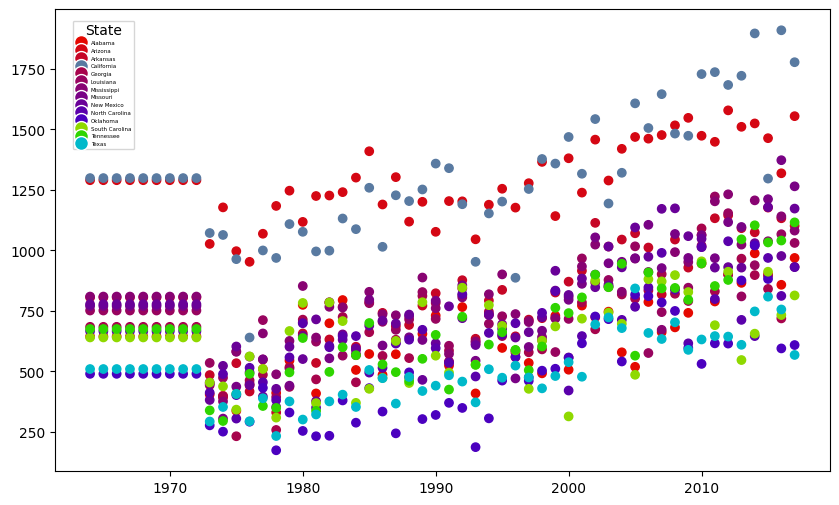

In [58]:
#graph of yield divided by years categorized by the states
fig, ax = plt.subplots(figsize=(10, 6))

colors = {'Alabama':'#E50800',
          'Arizona':'#D50713',
          'Arkansas':'#C60626',
          'California':'#597AA1',
          'Georgia':'#A7044C',
          'Louisiana':'#98045F',
          'Mississippi':'#880372',
          'Missouri':'#790285',
          'New Mexico':'#690198',
          'North Carolina':'#5A00AB',
          'Oklahoma':'#4B00BF',
          'South Carolina':'#8FD900',
          'Tennessee':'#2FD500',
          'Texas':'#00B9CA'
           }

ax.scatter(df_cotton['Year'], df_cotton['Lint Yield (Pounds/Harvested Acre)'], c=df_cotton['State'].apply(lambda x: colors[x]),)
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[state], markersize=10, label=state) for state in df_cotton['State'].unique()]
ax.legend(handles=legend_elements, title='State', loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=4)

plt.show()

Text(0.5, 1.0, 'Boxplot of Yield vs State')

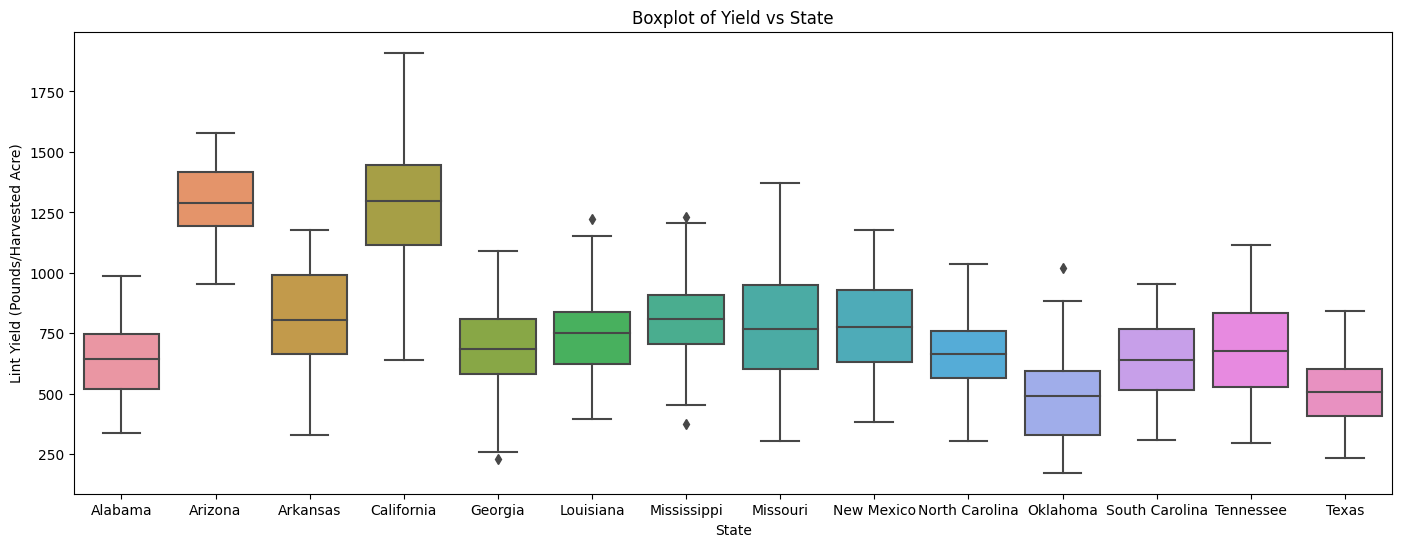

In [59]:
plt.figure(figsize=(17, 6))
sns.boxplot(x='State', y='Lint Yield (Pounds/Harvested Acre)', data=df_cotton)
plt.title("Boxplot of Yield vs State")

Text(0.5, 1.0, 'Potash (Pounds/Acre)')

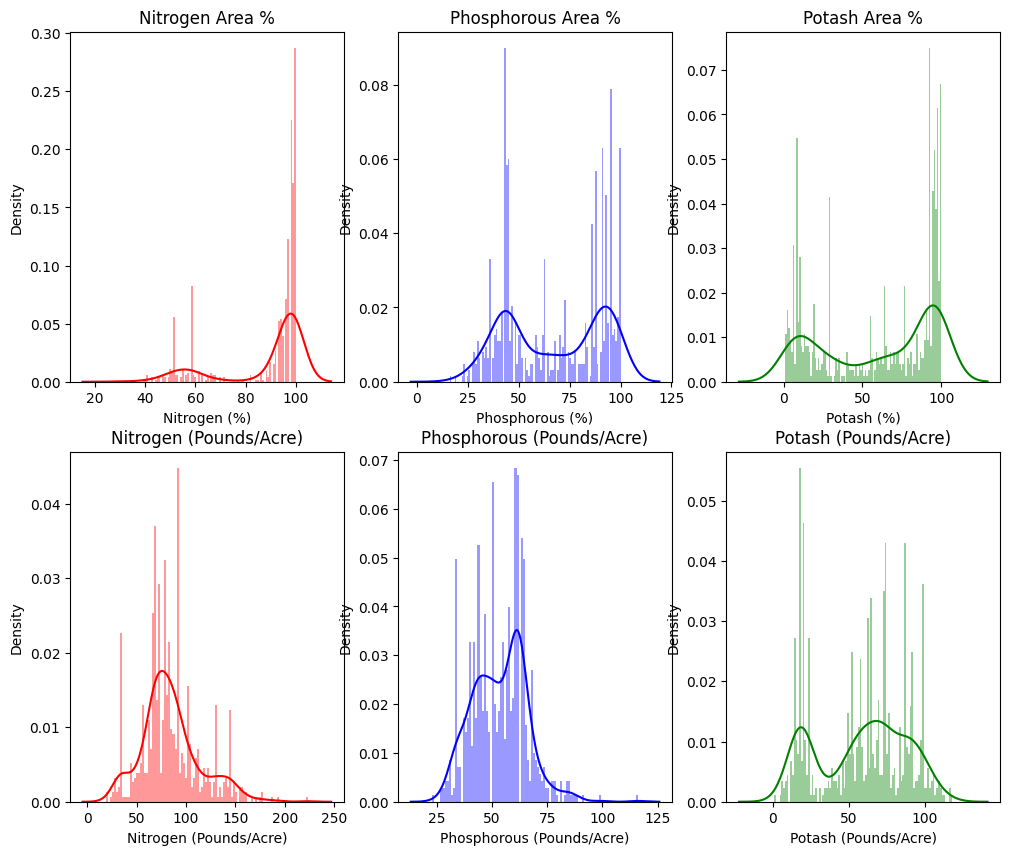

In [60]:
plt.figure(figsize=(12,10))
plt.subplot(231) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (%)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen Area %')

plt.subplot(232) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (%)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous Area %')

plt.subplot(233) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (%)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash Area %')

plt.subplot(234) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Nitrogen (Pounds/Acre)'], color='r', bins=100, hist_kws={'alpha': 0.4})
plt.title('Nitrogen (Pounds/Acre)')

plt.subplot(235) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Phosphorous (Pounds/Acre)'], color='b', bins=100, hist_kws={'alpha': 0.4})
plt.title('Phosphorous (Pounds/Acre)')

plt.subplot(236) #2 is row, 2 is column and 1 is position
sns.distplot(df_cotton['Potash (Pounds/Acre)'], color='g', bins=100, hist_kws={'alpha': 0.4})
plt.title('Potash (Pounds/Acre)')

Text(0.5, 0, 'State Name')

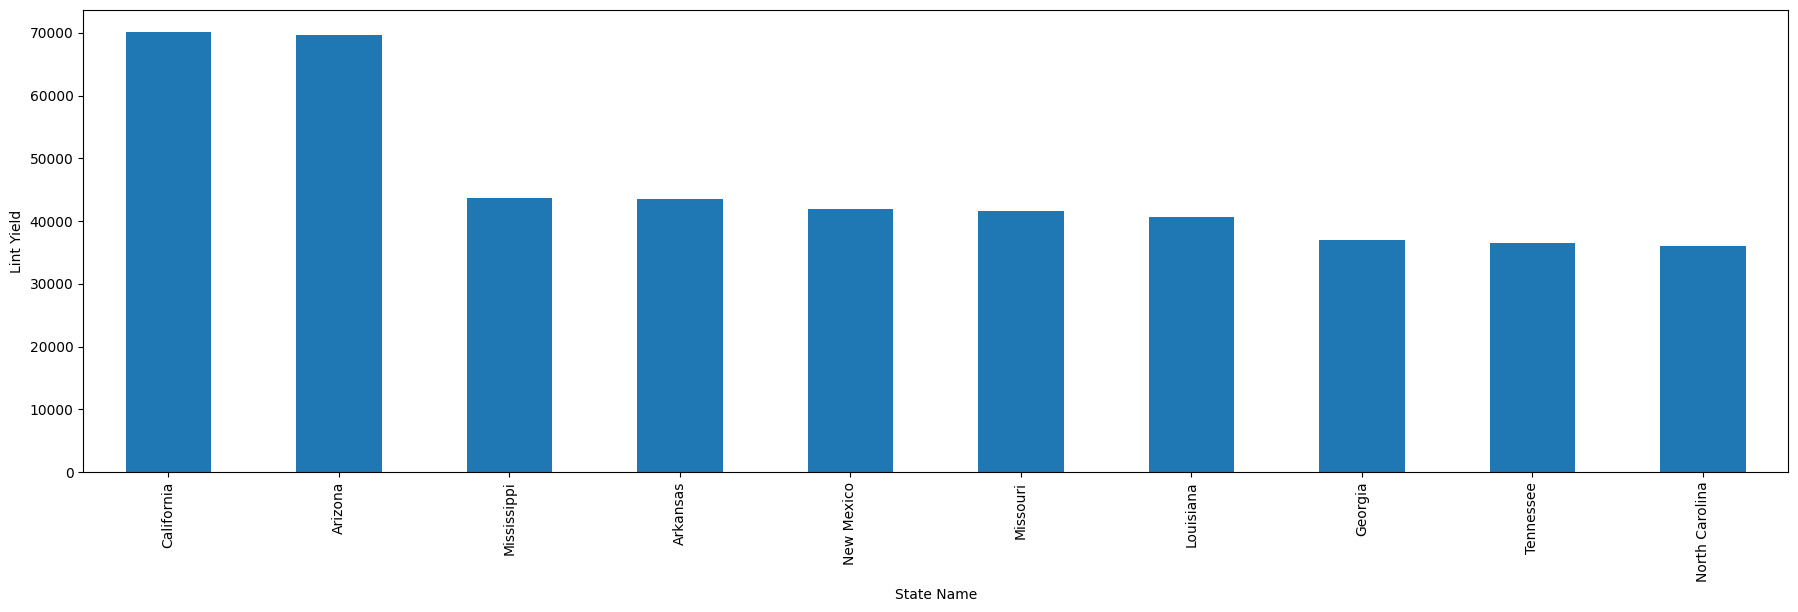

In [61]:
#top 10 states harvest
plt.figure(figsize=(22,6))
GraphData=df_cotton.groupby(['State'])['Lint Yield (Pounds/Harvested Acre)'].sum().nlargest(10)


GraphData.plot(kind='bar')
plt.ylabel('Lint Yield')
plt.xlabel('State Name')

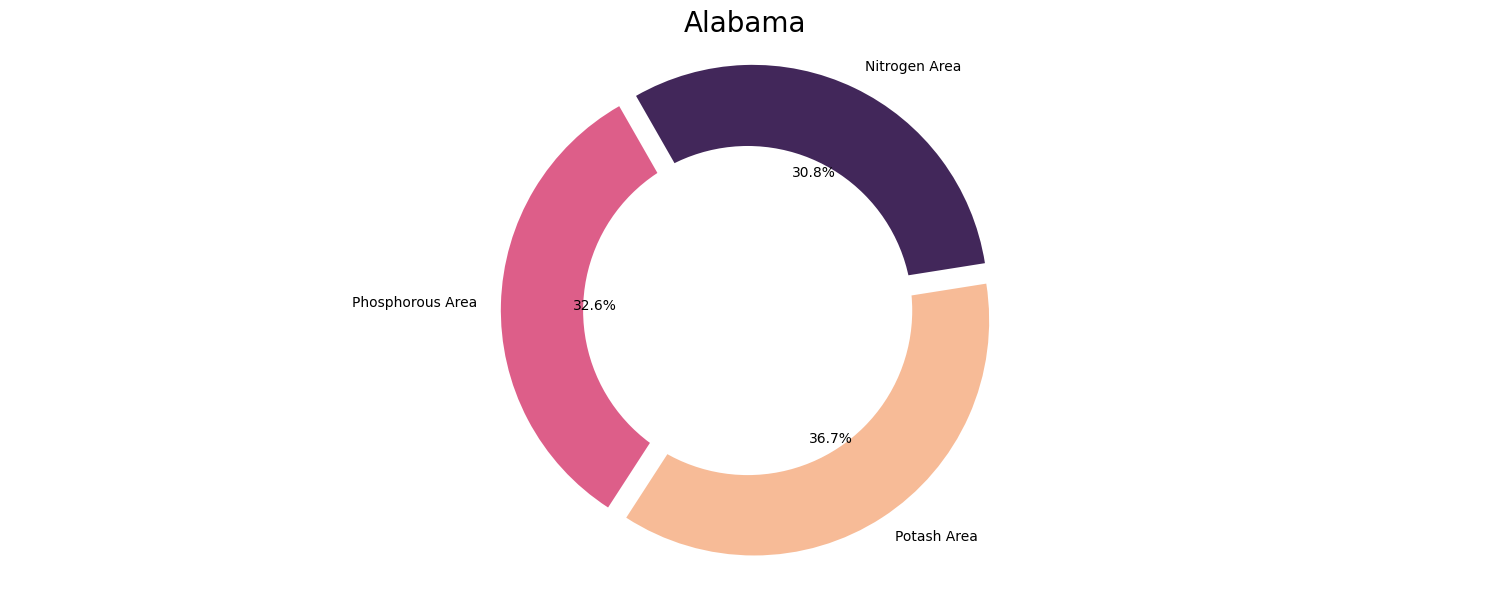

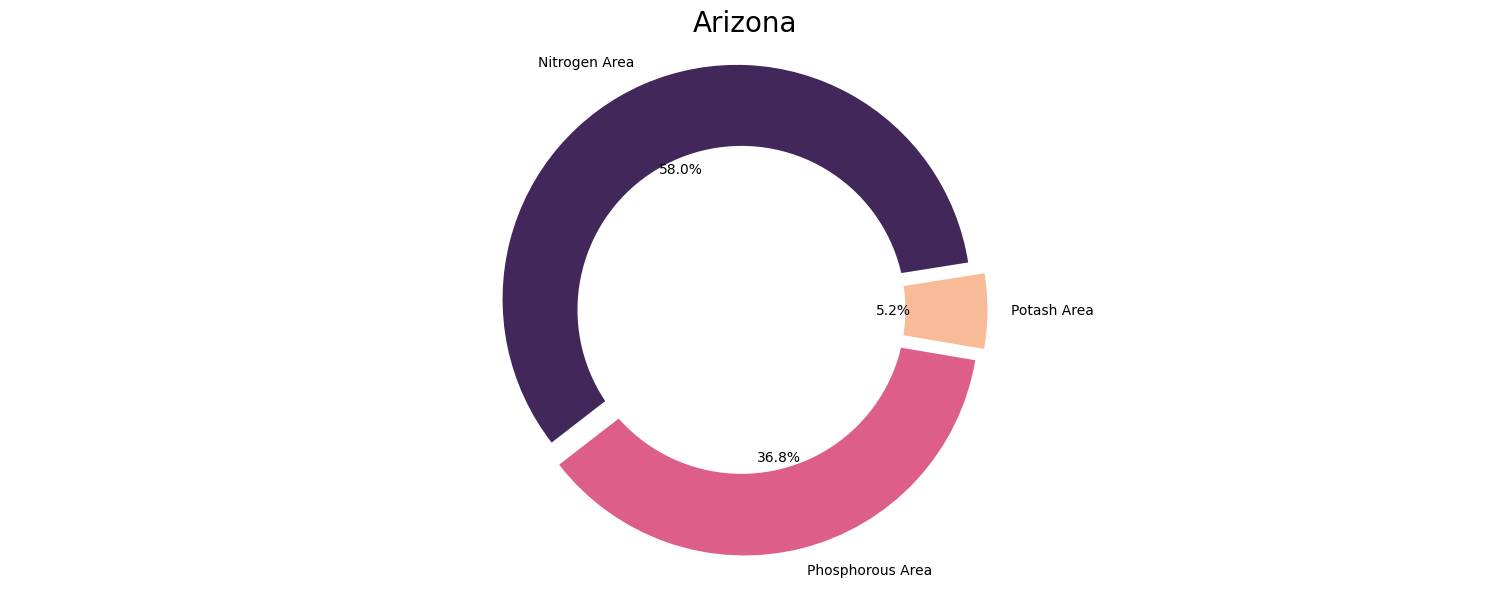

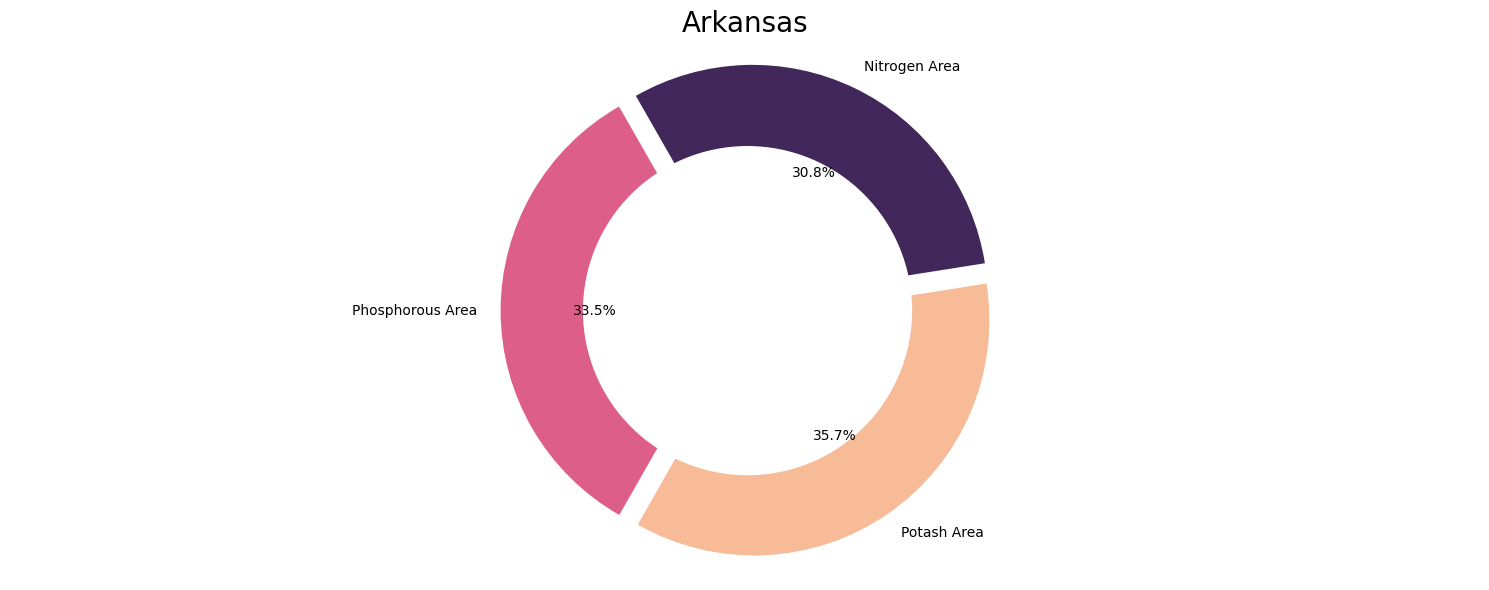

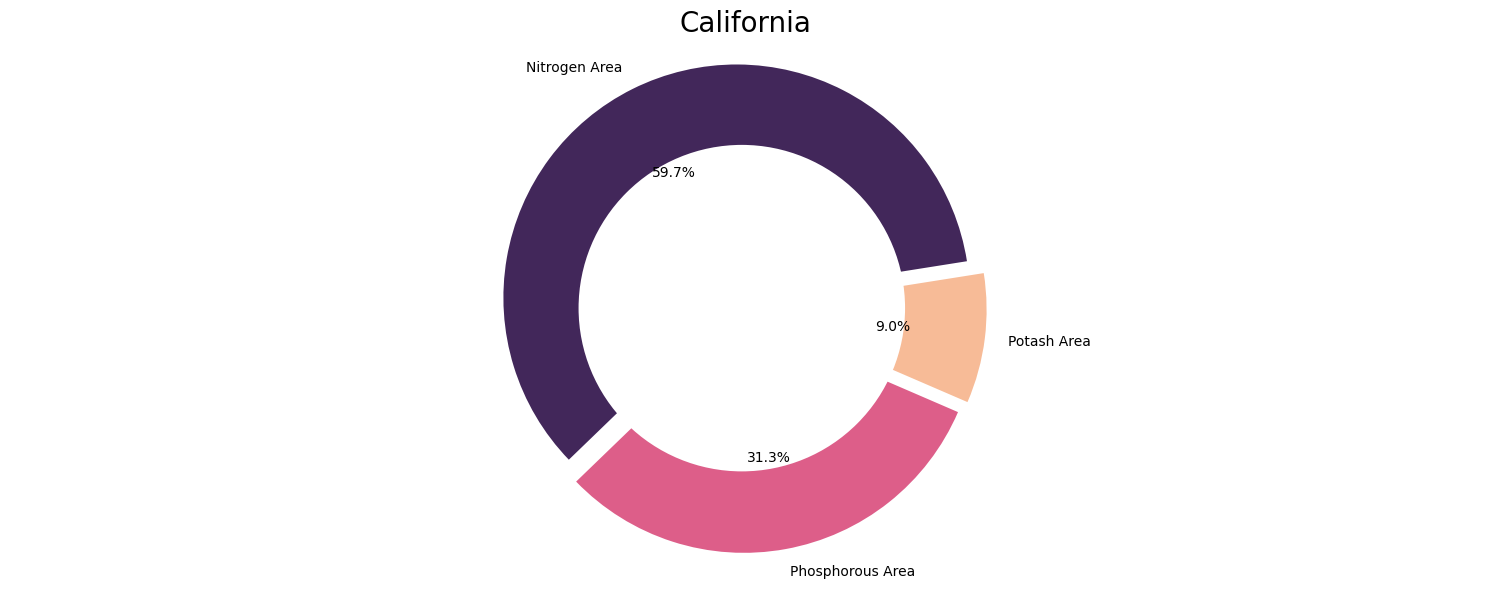

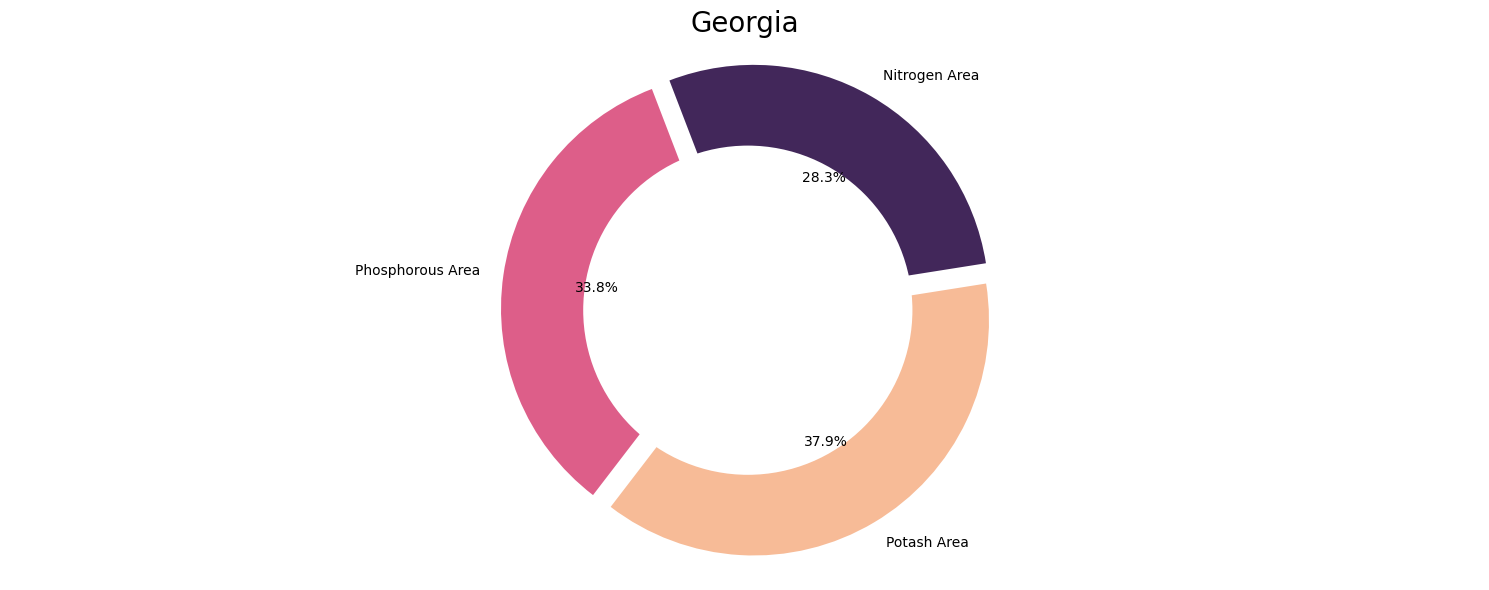

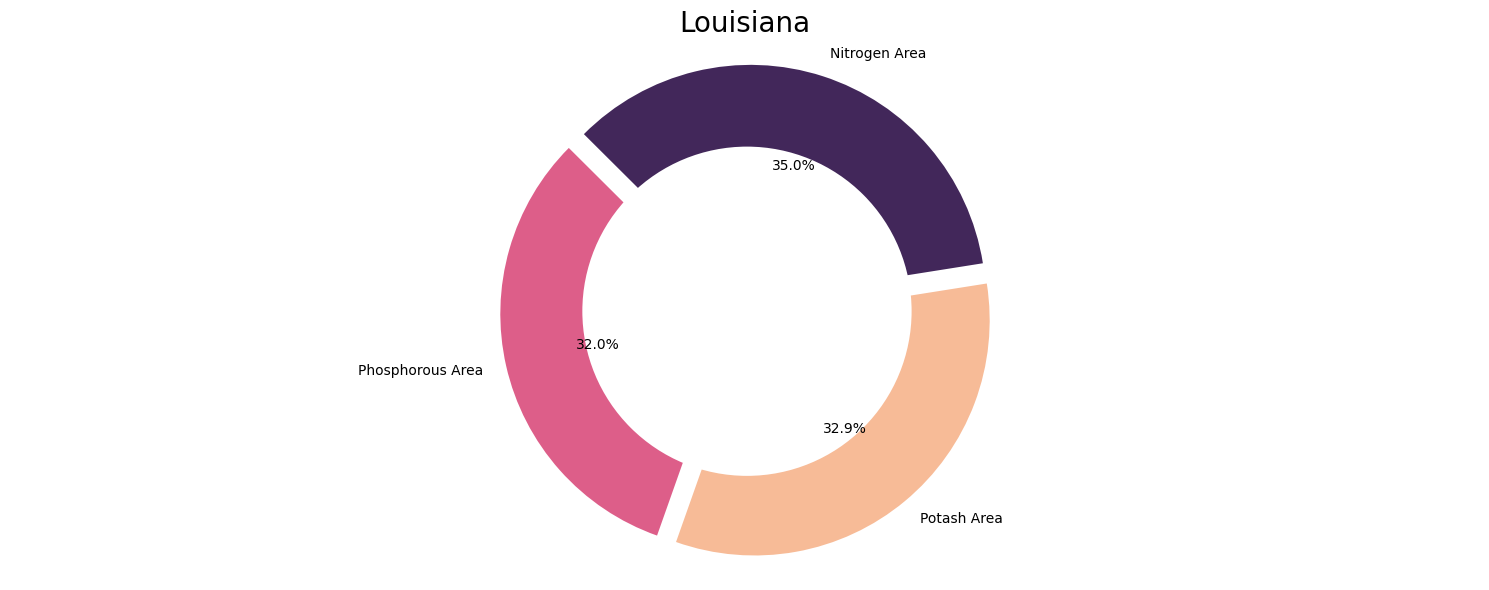

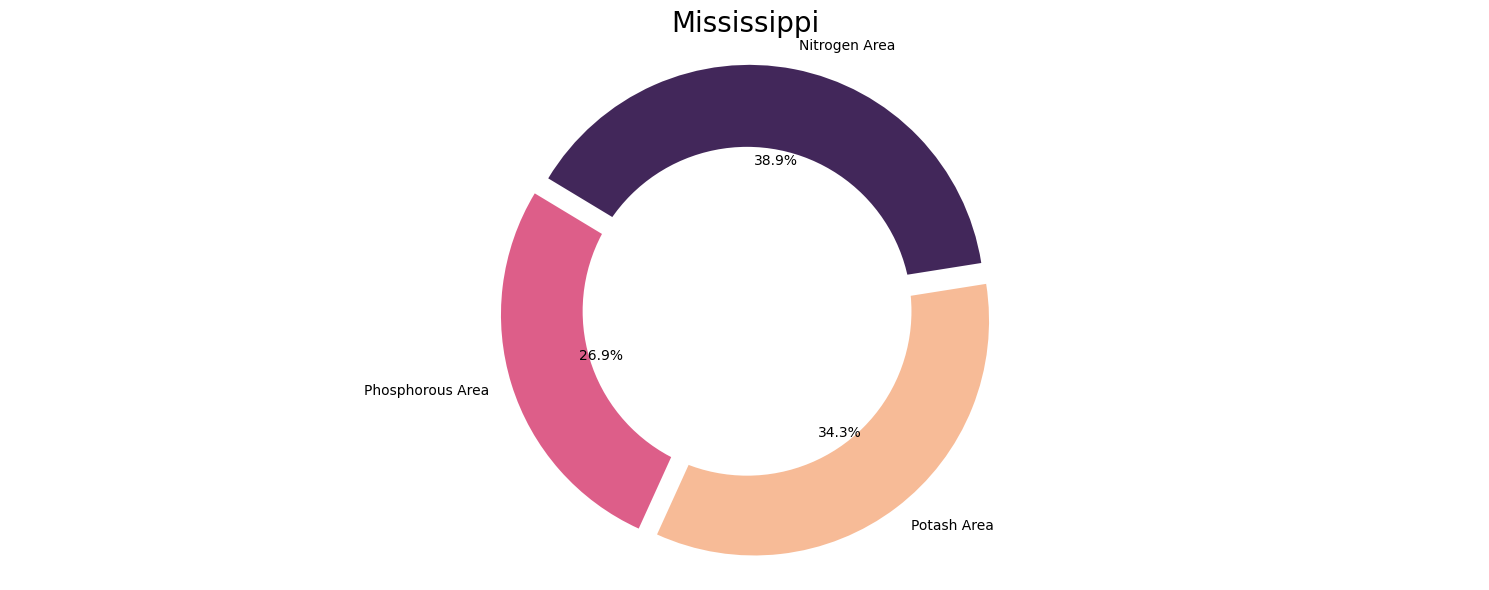

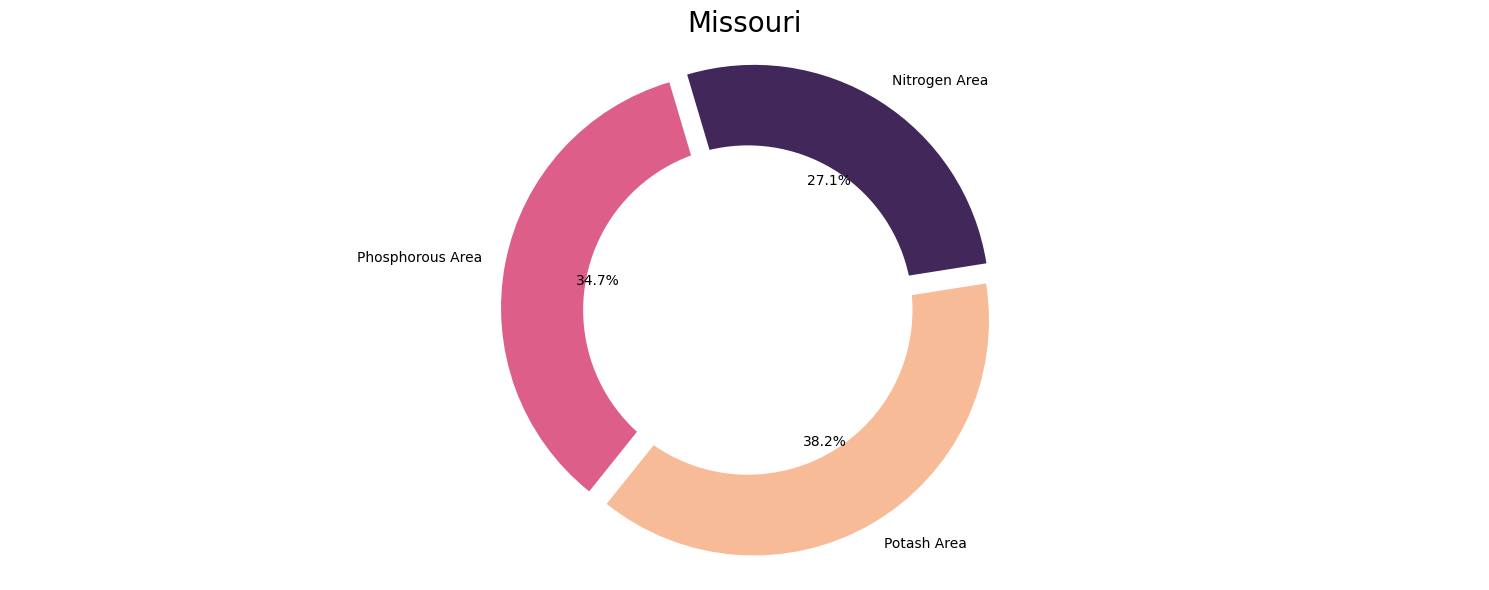

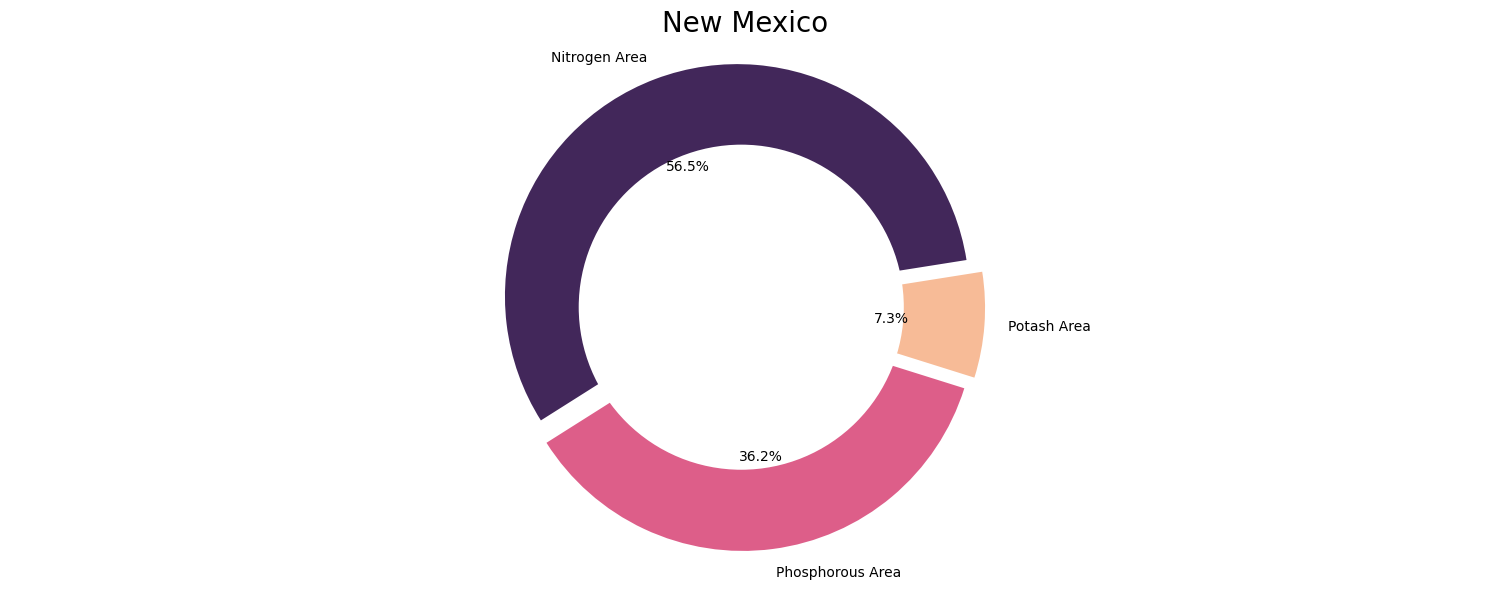

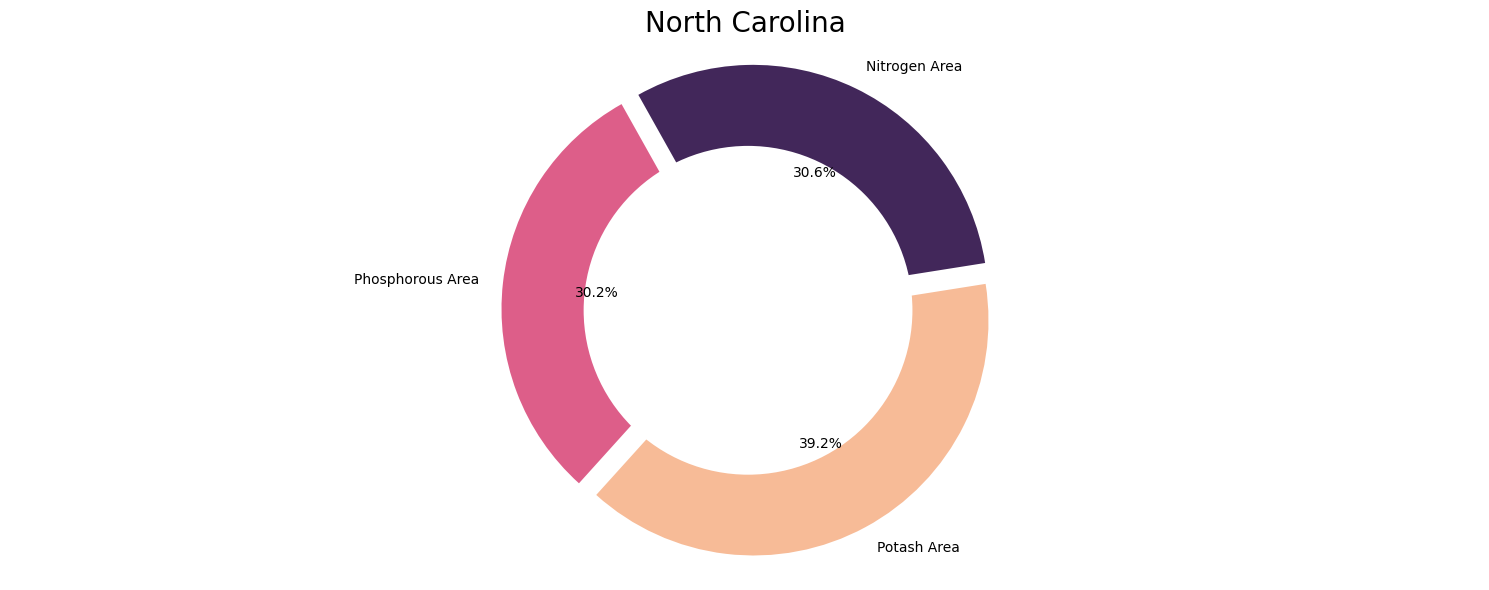

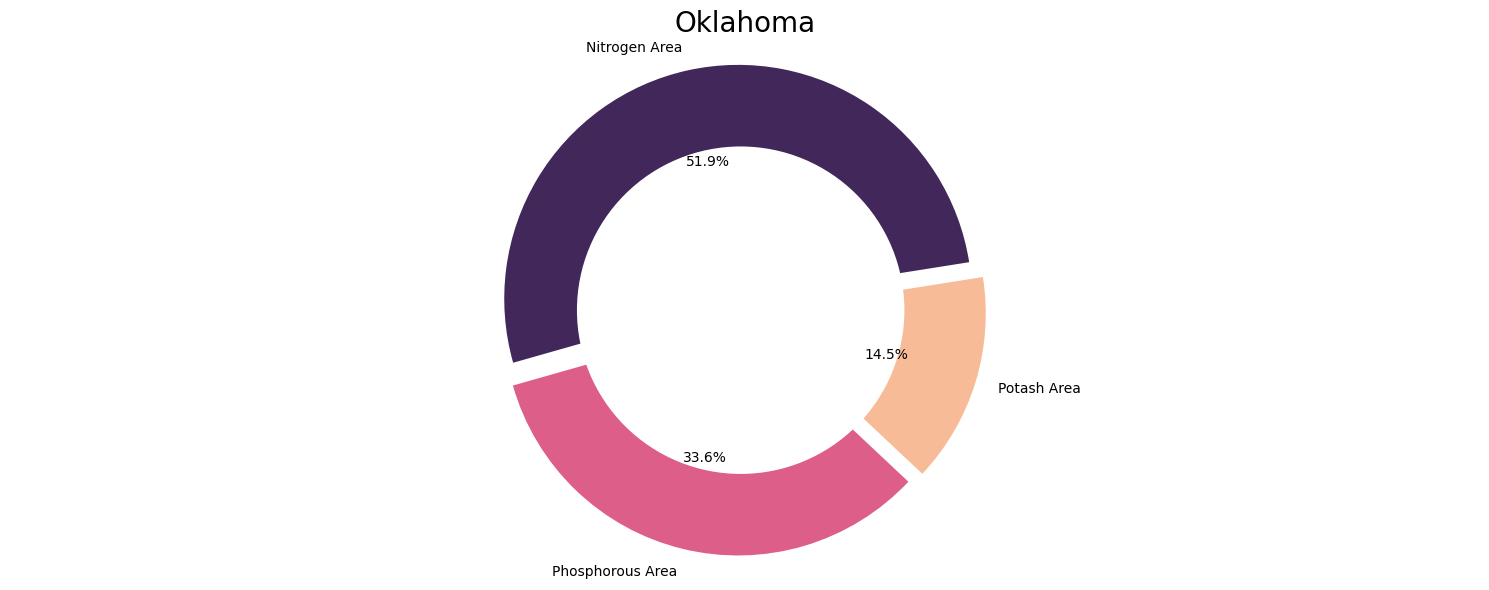

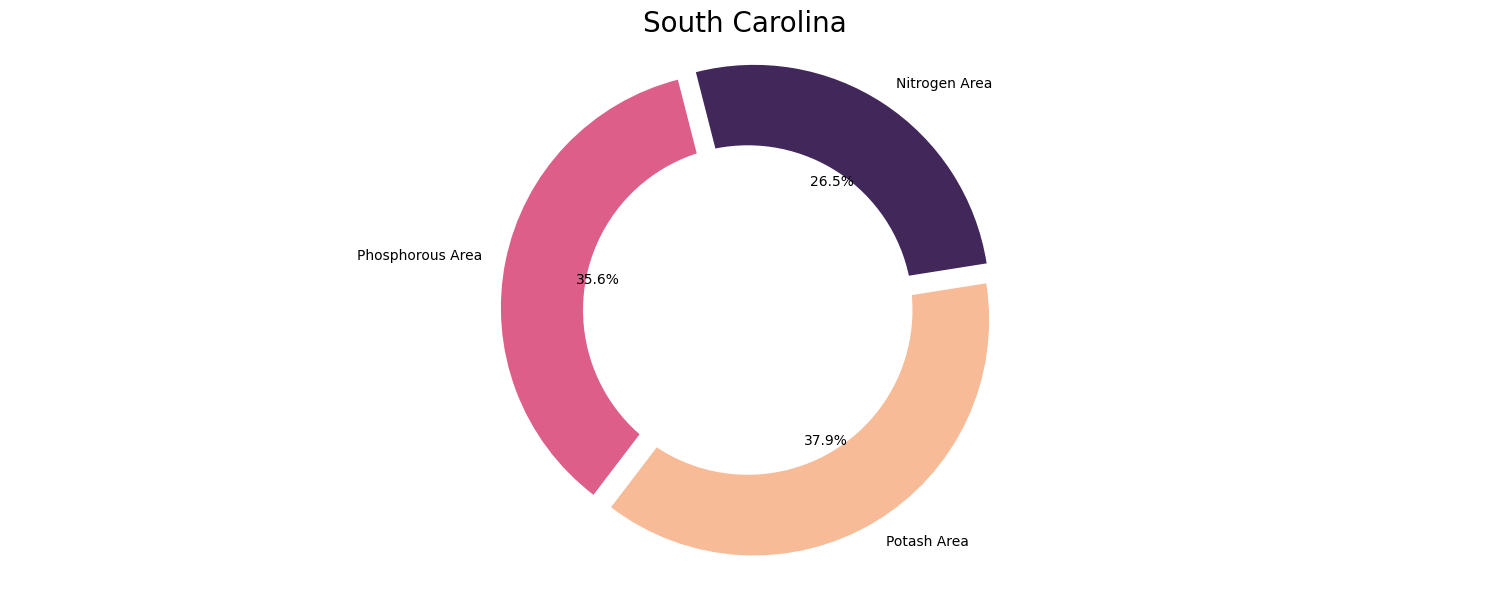

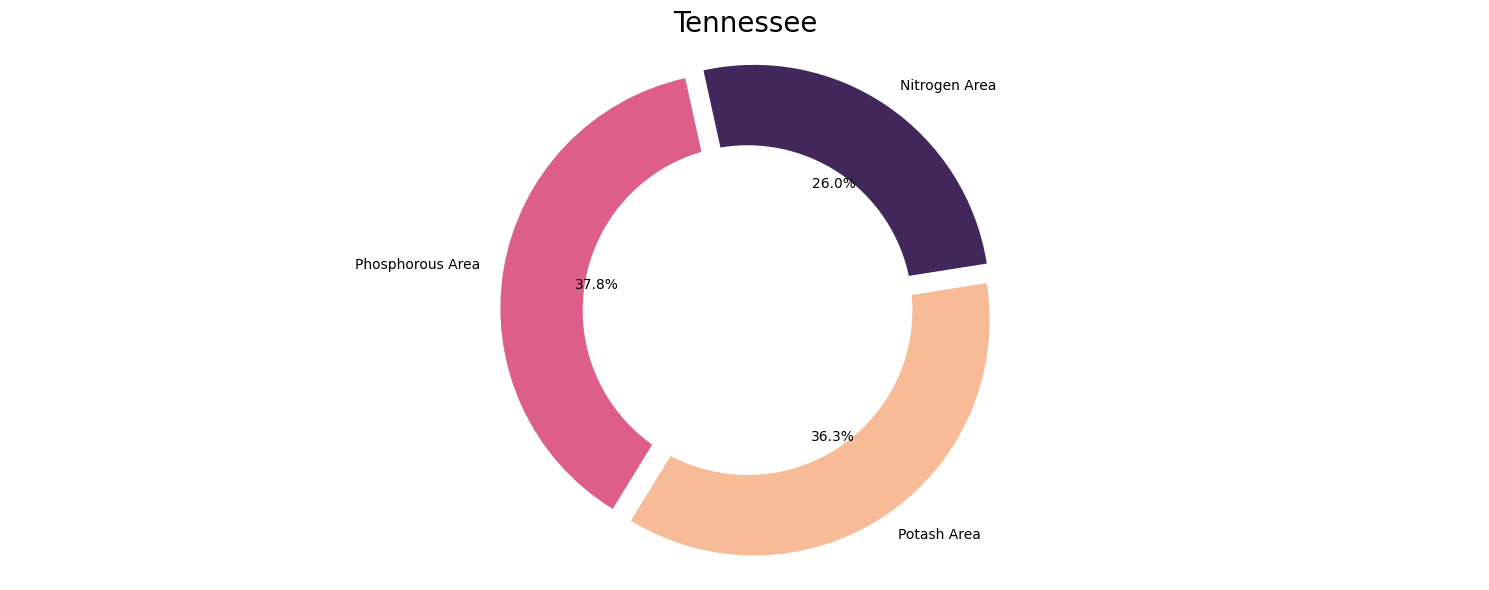

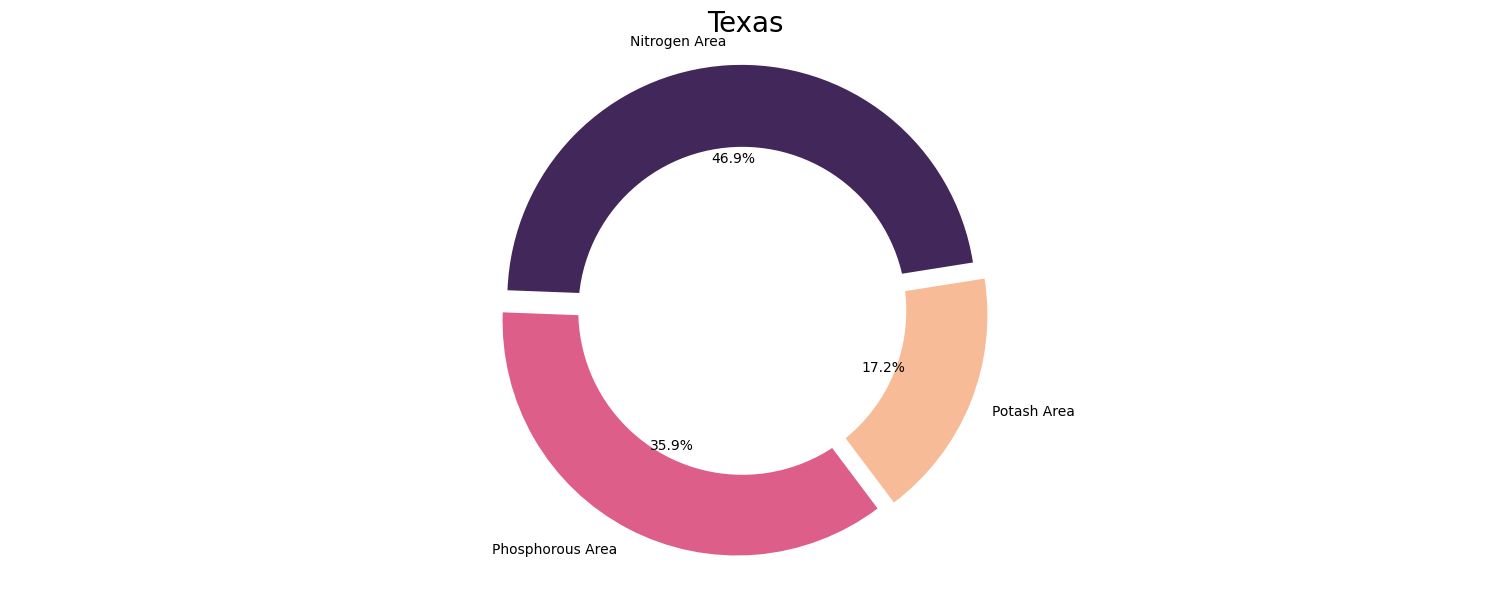

In [62]:
def plot_pie(nitrogen,phosphorous,potash,title):
    labels = ['Nitrogen Area','Phosphorous Area','Potash Area']
    sizes = [nitrogen,phosphorous,potash]
    color= ['#42275a','#dd5e89','#f7bb97']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode = explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title,fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()
    
States = df_cotton['State'].unique().tolist()
States

state_df = pd.DataFrame()

for state in States:
    one_state_df = df_cotton.loc[df_cotton['State'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    phosphorous = one_state_df['Phosphorous (%)'].values[-1]
    potash = one_state_df['Potash (%)'].values[-1]
    nitrogen = df_cotton['Nitrogen (%)'].values[-1]
    plot_pie(nitrogen,phosphorous,potash,state)

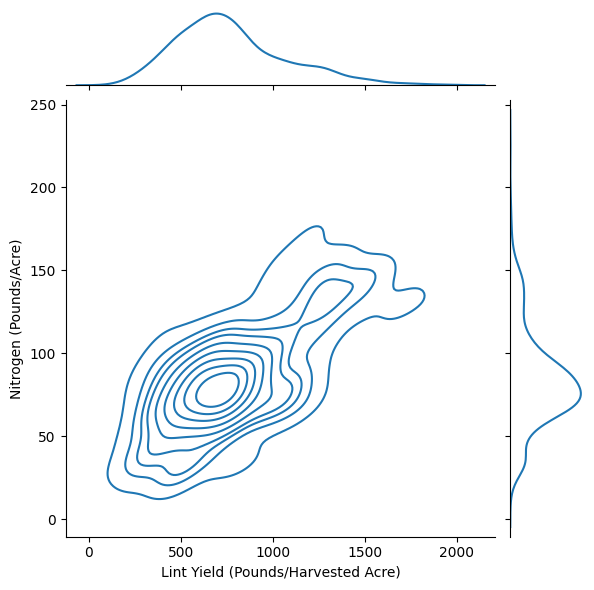

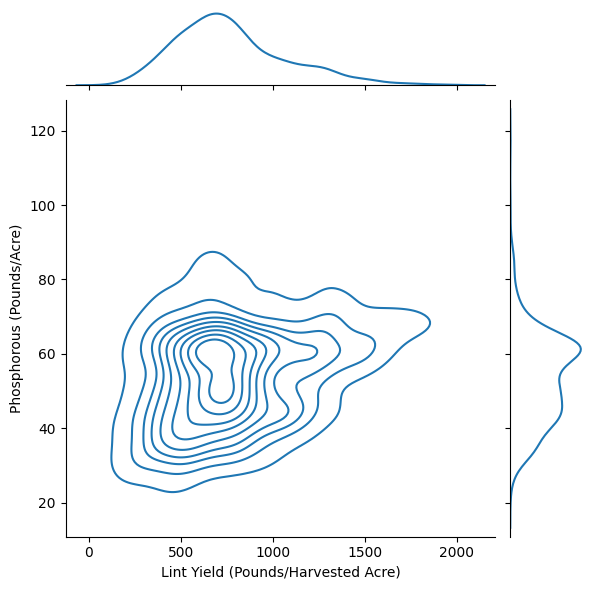

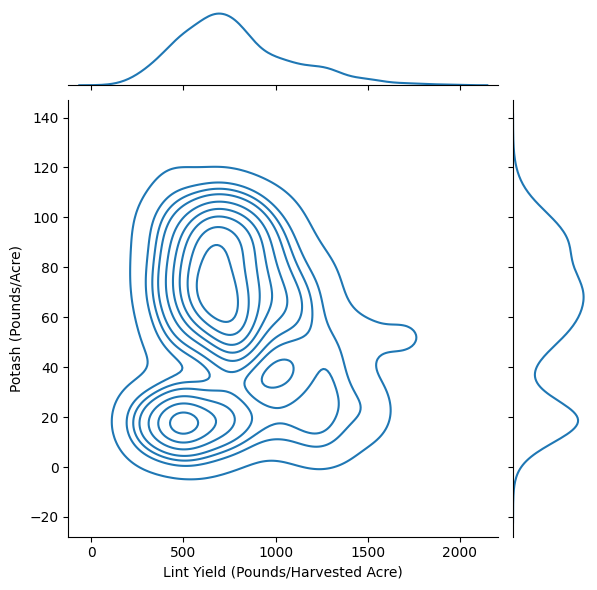

In [63]:
sns.jointplot(data=df_cotton, x='Lint Yield (Pounds/Harvested Acre)', y='Nitrogen (Pounds/Acre)', kind='kde')
sns.jointplot(data=df_cotton, x='Lint Yield (Pounds/Harvested Acre)', y='Phosphorous (Pounds/Acre)', kind='kde')
sns.jointplot(data=df_cotton, x='Lint Yield (Pounds/Harvested Acre)', y='Potash (Pounds/Acre)', kind='kde')


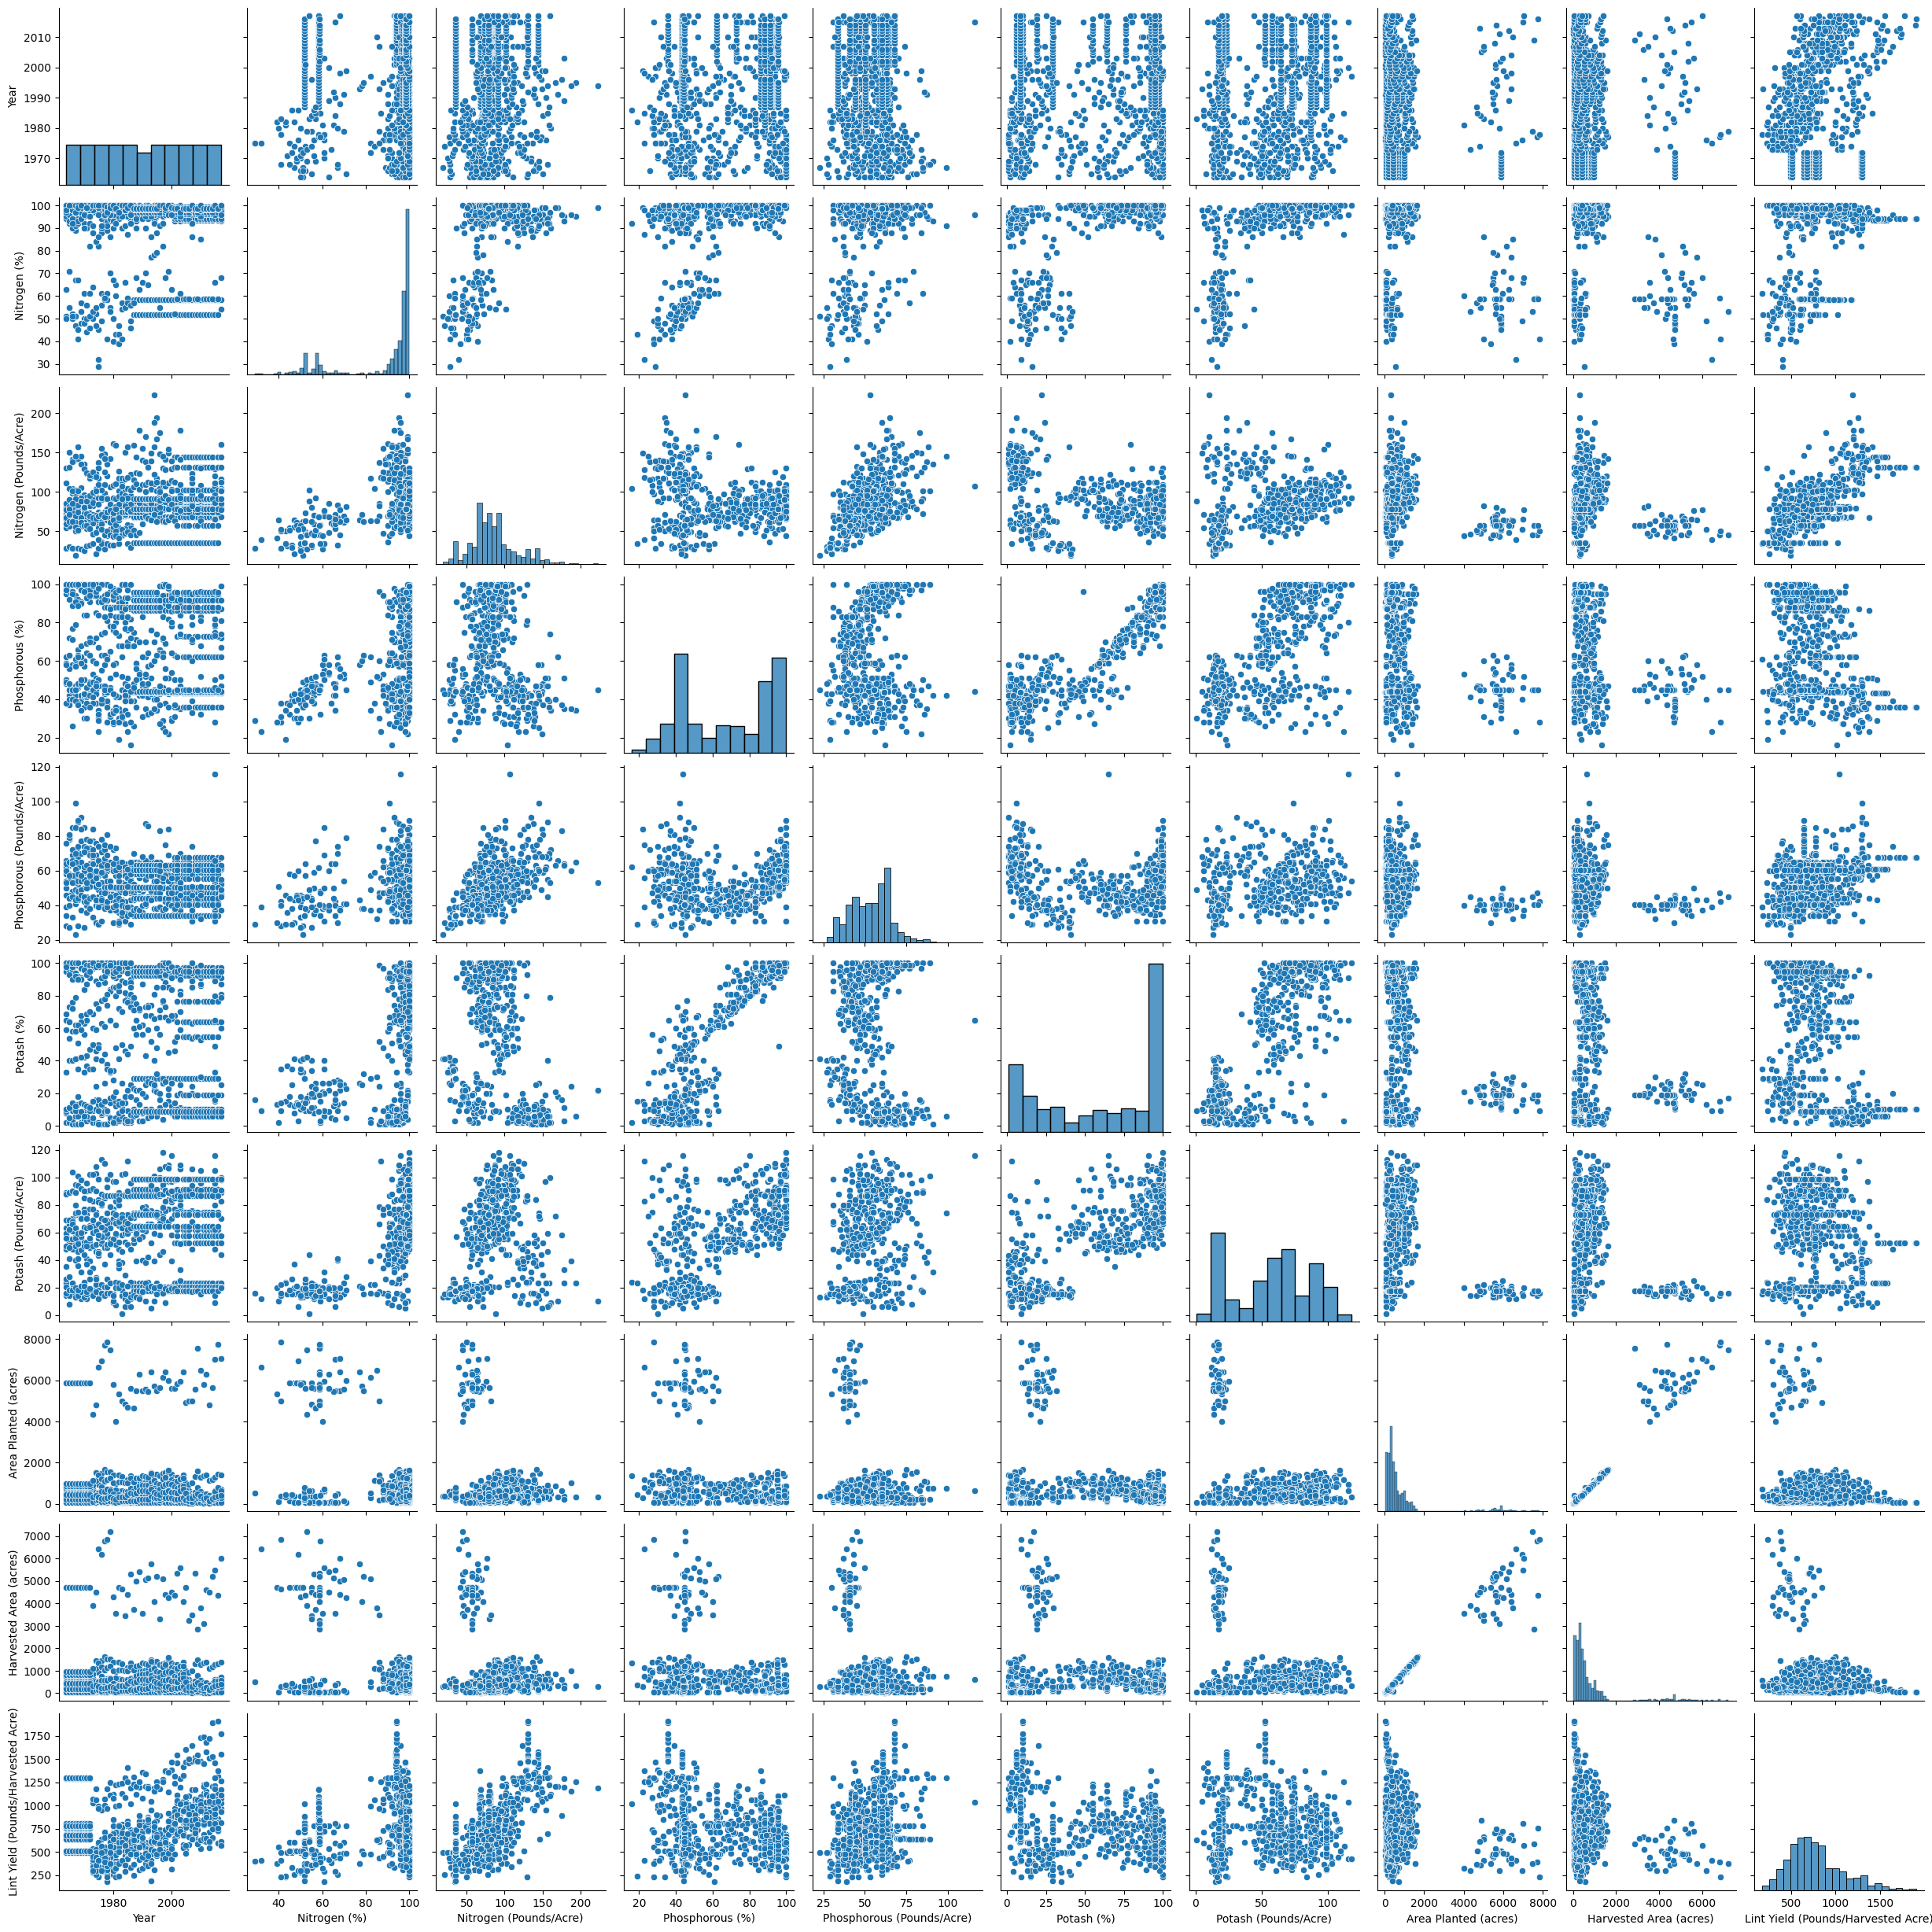

In [64]:
sns.pairplot(df_cotton)

In [65]:
df_cotton['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Georgia',
       'Louisiana', 'Mississippi', 'Missouri', 'New Mexico',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
       'Texas'], dtype=object)

In [66]:
#covertinf the states to categorical variables
mapping = ({'Alabama':1,
'Arizona':2,
'Arkansas':3,
'California':4,
'Georgia':5,
'Louisiana':6,
'Mississippi':7,
'Missouri':8,
'New Mexico':9,
'North Carolina':10,
'Oklahoma':11,
'South Carolina':12,
'Tennessee':13,
'Texas':14,
           })
df_cotton=df_cotton.replace({'State': mapping})

In [67]:
df_cotton

,State,Year,Nitrogen (%),Nitrogen (Pounds/Acre),Phosphorous (%),Phosphorous (Pounds/Acre),Potash (%),Potash (Pounds/Acre),Area Planted (acres),Harvested Area (acres),Lint Yield (Pounds/Harvested Acre)
0,1,1964,99.00000,72.000000,100.000000,62.00000,99.0,63.000000,419.355556,407.822222,644.688889
1,1,1965,100.00000,81.000000,100.000000,63.00000,100.0,66.000000,419.355556,407.822222,644.688889
2,1,1966,100.00000,83.000000,100.000000,69.00000,100.0,70.000000,419.355556,407.822222,644.688889
3,1,1967,100.00000,78.000000,100.000000,71.00000,100.0,73.000000,419.355556,407.822222,644.688889
4,1,1968,100.00000,71.000000,99.000000,71.00000,99.0,73.000000,419.355556,407.822222,644.688889
...,...,...,...,...,...,...,...,...,...,...,...
751,14,2013,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,4800.000000,4500.000000,610.000000
752,14,2014,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,5650.000000,5200.000000,748.000000
753,14,2015,66.00000,65.000000,46.000000,34.00000,16.0,14.000000,7000.000000,5500.000000,809.000000
754,14,2016,58.72093,57.232558,44.744186,40.55814,19.0,17.581395,7750.000000,4350.000000,756.000000


In [68]:
#splitting dimensions from other attributes
X=df_cotton.drop('Lint Yield (Pounds/Harvested Acre)',axis=1)
Y=df_cotton['Lint Yield (Pounds/Harvested Acre)']


In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

# Building Models

### K-nearest neighbours

In [70]:
model1 = KNeighborsRegressor()

In [71]:
model1.fit(X_train,y_train)

KNeighborsRegressor()

In [72]:
y_pred1 = model1.predict(X_test)

In [73]:
print("Mean squared error of K-nearest neighbours",mean_squared_error(y_test,y_pred1))

Mean squared error of K-nearest neighbours 27923.50425302144


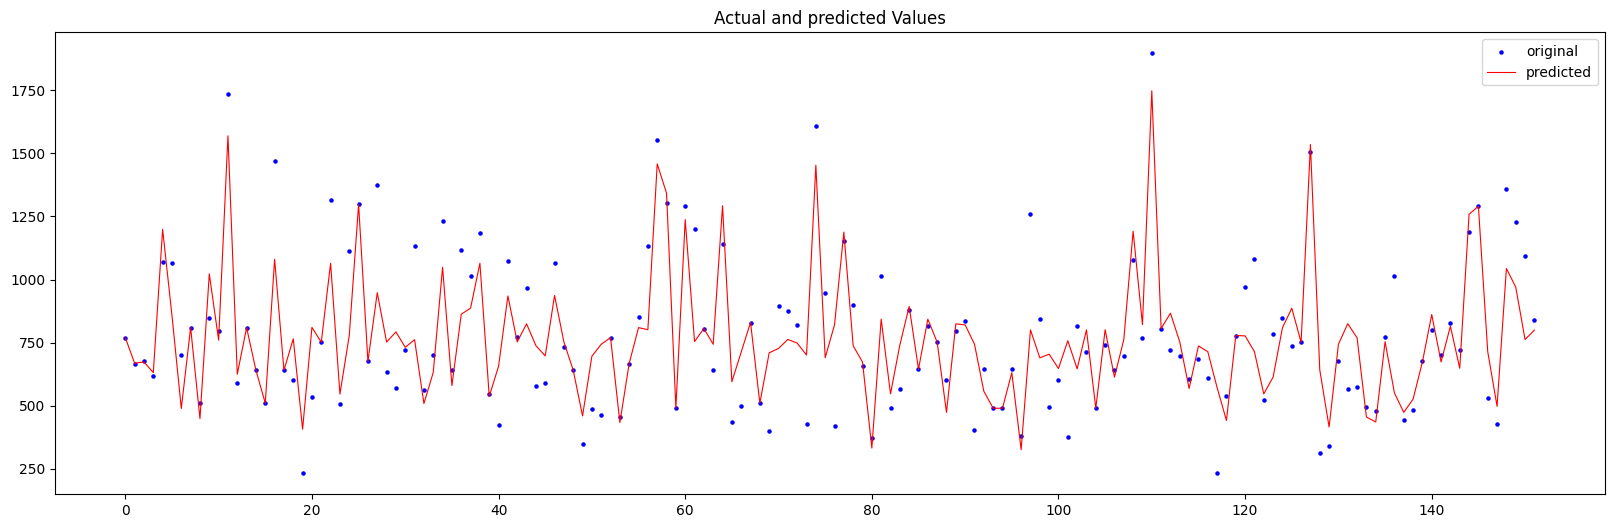

In [87]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred1, lw=0.8, color="red", label="predicted")
plt.title("Actual and predicted Values")
plt.legend()
plt.show()

### Support Vecor Machine Regressor

In [75]:
model2 = SVR()

In [76]:
model2.fit(X_train,y_train)

SVR()

In [77]:
y_pred2 = model2.predict(X_test)

In [78]:
print("Mean squared error of Support Vector Regressor",mean_squared_error(y_test,y_pred2))

Mean squared error of Support Vector Regressor 97451.28567645788


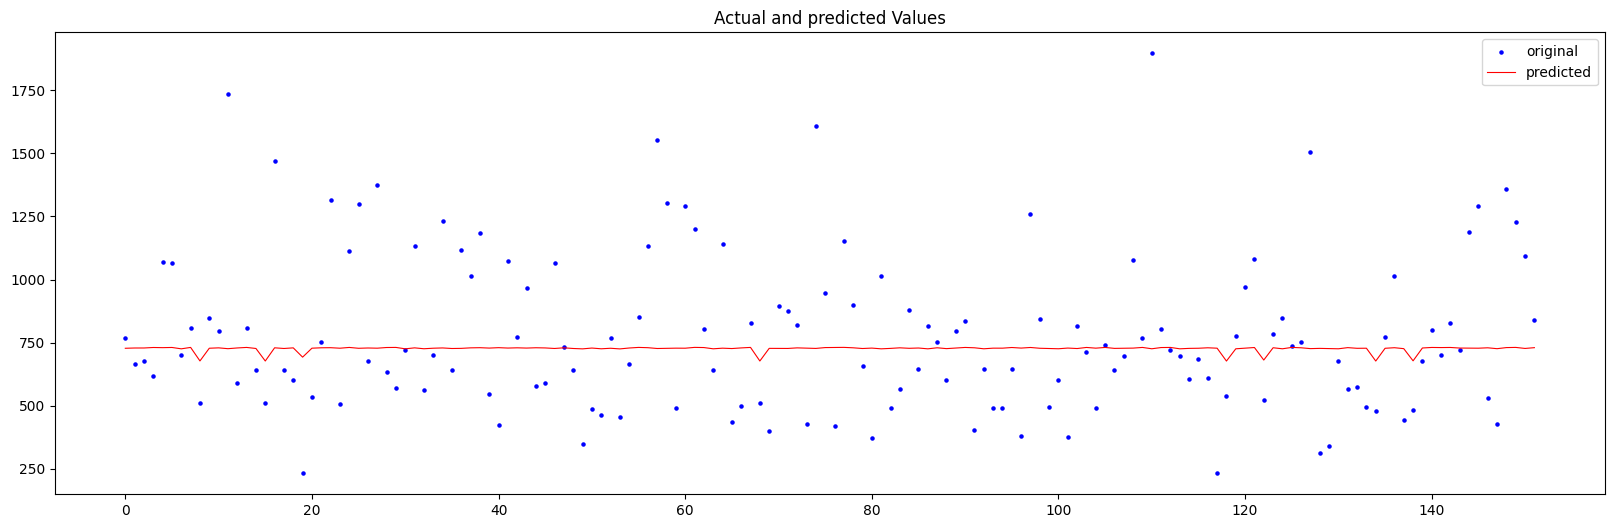

In [79]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred2, lw=0.8, color="red", label="predicted")
plt.title("Actual and predicted Values")
plt.legend()
plt.show()

### Decision Tree Regressor

In [81]:
model3 = DecisionTreeRegressor()

In [82]:
model3.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
y_pred3 = model3.predict(X_test)

In [84]:
print("Mean squared error of Decision Tree Regressor",mean_squared_error(y_test,y_pred3))

Mean squared error of Decision Tree Regressor 20922.607374918778


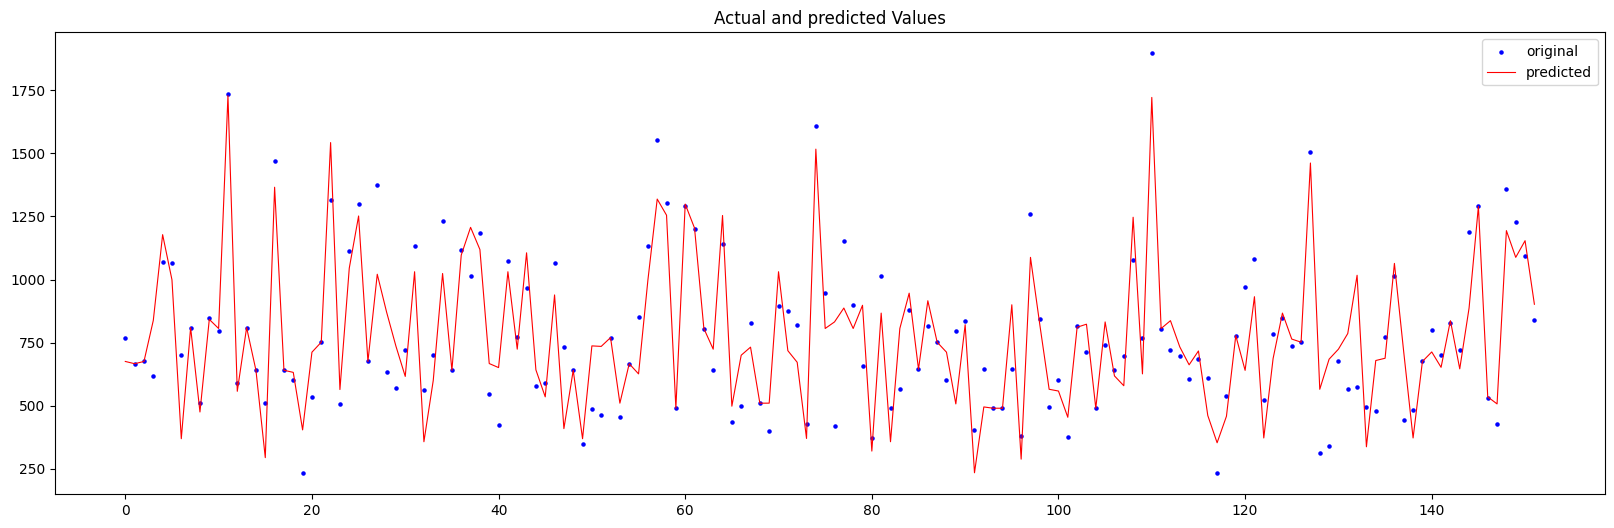

In [86]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred3, lw=0.8, color="red", label="predicted")
plt.title("Actual and predicted Values")
plt.legend()
plt.show()

### USING ENSEMBLE

#### Adaboost

In [119]:
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=model3 ,learning_rate=1)

In [120]:
print(RegModel)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=1,
                  n_estimators=100)


In [121]:
#Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

In [122]:
print("Mean squared error of AdaBoost Regressor",mean_squared_error(y_test,prediction))

Mean squared error of AdaBoost Regressor 14463.70602014295


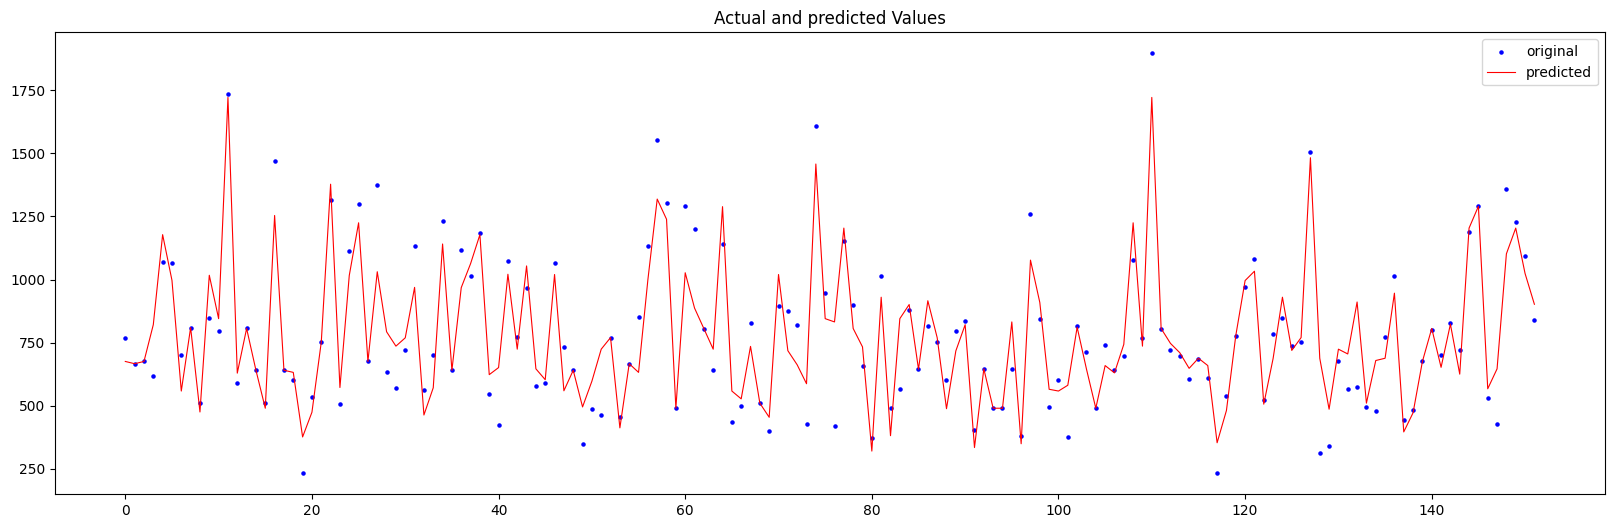

In [124]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction, lw=0.8, color="red", label="predicted")
plt.title("Actual and predicted Values")
plt.legend()
plt.show()

#### XGBoost

In [154]:
import numpy as np

# Assuming 'y' is a list or NumPy array containing your target variable values
mean_y = np.mean(Y)
print("Mean of target variable y:", mean_y)


Mean of target variable y: 772.4873015873014


In [155]:
XGboost = model = XGBRegressor(n_estimators=5000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8,booster='gbtree',base_score = mean_y)

In [156]:
XGboost.fit(X_train,y_train)

XGBRegressor(base_score=772.4873015873014, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=5000,
             n_jobs=None, num_parallel_tree=None, ...)

In [157]:
prediction1 = XGboost.predict(X_test)

In [158]:
print("Mean squared error of XGBoost Regressor",mean_squared_error(y_test,prediction1))

Mean squared error of XGBoost Regressor 13193.10798884522


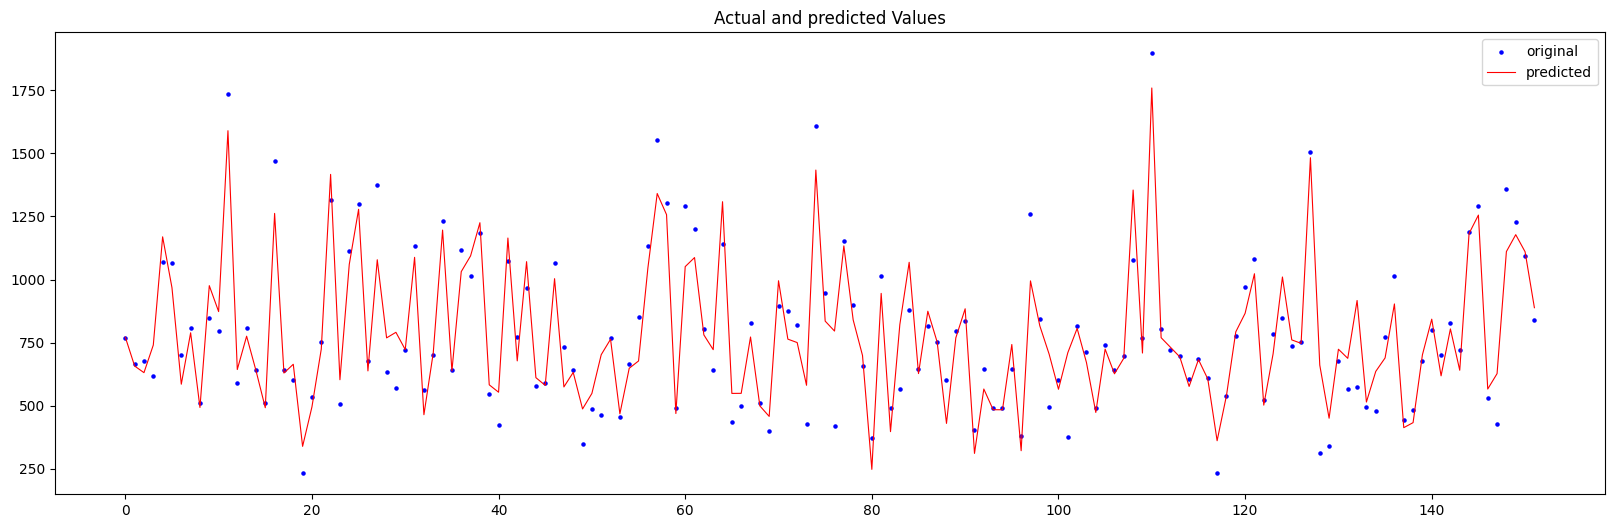

In [159]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction1, lw=0.8, color="red", label="predicted")
plt.title("Actual and predicted Values")
plt.legend()
plt.show()

### Gradient Boosting Regressor

In [171]:
gb = GradientBoostingRegressor(n_estimators=10000, learning_rate=1)

In [172]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1, n_estimators=10000)

In [173]:
prediction3 = gb.predict(X_test)

In [175]:
print("Mean squared error of Gradient Boost Regressor",mean_squared_error(y_test,prediction3))

Mean squared error of Gradient Boost Regressor 26600.089361798655


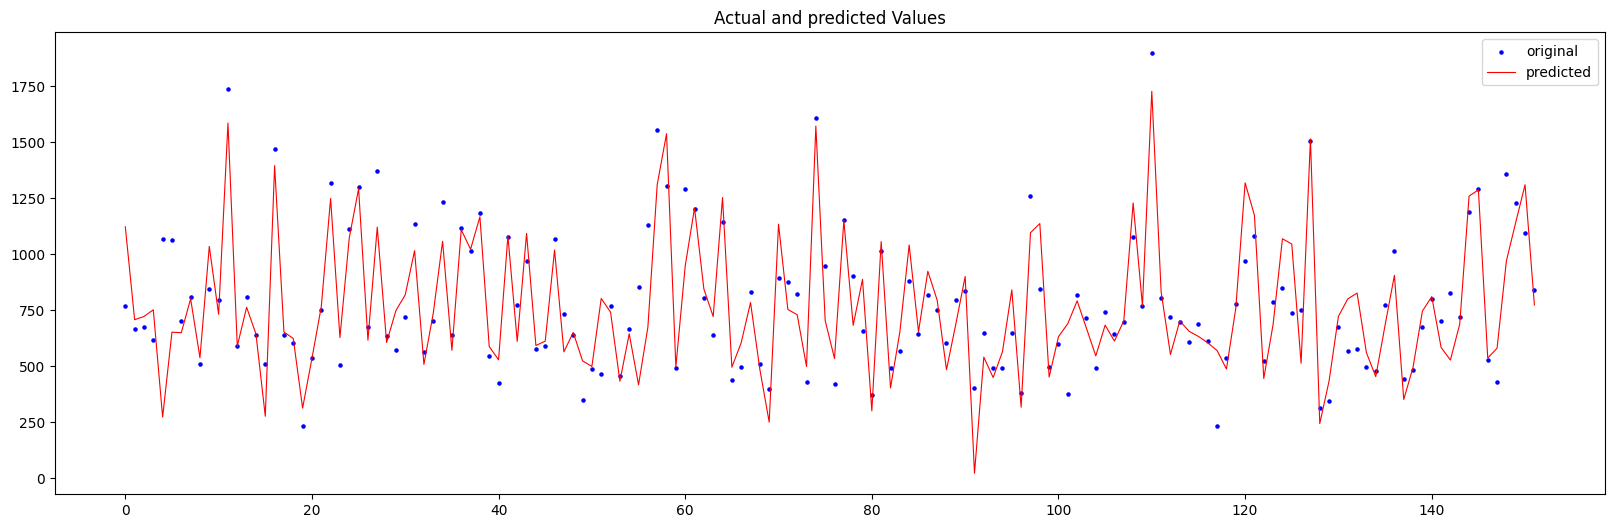

In [176]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,6))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction3, lw=0.8, color="red", label="predicted")
plt.title("Actual and predicted Values")
plt.legend()
plt.show()